In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
get_ipython().run_line_magic('pylab', 'inline')
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 100

In [10]:
print(terminationStates)

[[0, 0], [3, 3]]


In [3]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [9]:
print(returns)

{(0, 0): [], (0, 1): [-1.0, -1.0, -2.176, -2.3833599999999997, -2.4300159999999997, -2.4980408958975997, -1.0, -2.4967348264959996, -2.4980408958975997, -2.3833599999999997, -2.4300159999999997, -2.4945580441599997, -2.499945157623399, -1.0, -1.6, -1.0, -1.96, -1.0, -1.0, -1.6, -1.0, -1.96, -2.176, -2.3056, -1.0, -1.96, -1.0, -1.0, -1.0, -1.6, -1.0, -2.4909300735999995, -2.4967348264959996, -1.0, -1.0, -1.96, -2.176, -1.0, -1.0, -1.96, -1.0, -1.6, -1.0, -1.0, -1.0, -1.96, -1.0, -1.0, -1.96, -1.0, -1.6, -1.96, -2.3056, -1.0, -1.6, -1.0, -2.4999802567444234, -1.0, -2.4848834559999995], (0, 2): [-1.6, -1.96, -2.3056, -2.4967348264959996, -2.499908596038998, -1.96, -2.3056, -1.6, -2.176, -2.3833599999999997, -2.4580095999999996, -2.4945580441599997, -2.49882453753856, -2.499294722523136, -1.96, -2.4748057599999997, -2.4848834559999995, -1.6, -2.4848834559999995, -2.499294722523136, -2.499967094574039, -2.4999802567444234, -2.4999881540466538, -1.6, -1.6, -2.176, -2.3833599999999997, -1.6, 

In [4]:
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState
    return episode

In [11]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 987.75it/s]

[[[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [1, 0], -1, [3, 1]], [[3, 1], [1, 0], -1, [3, 1]], [[3, 1], [0, 1], -1, [3, 2]], [[3, 2], [0, 1], -1, [3, 3]]]
[[[2, 3], [1, 0], -1, [3, 3]]]
[[[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [-1, 0], -1, [0, 2]], [[0, 2], [0, 1], -1, [0, 3]], [[0, 3], [1, 0], -1, [1, 3]], [[1, 3], [0, -1], -1, [1, 2]], [[1, 2], [1, 0], -1, [2, 2]], [[2, 2], [0, -1], -1, [2, 1]], [[2, 1], [0, 1], -1, [2, 2]], [[2, 2], [1, 0], -1, [3, 2]], [[3, 2], [-1, 0], -1, [2, 2]], [[2, 2], [-1, 0], -1, [1, 2]], [[1, 2], [0, -1], -1, [1, 1]], [[1, 1], [0, -1], -1, [1, 0]], [[1, 0], [0, -1], -1, [1, 0]], [[1, 0], [-1, 0], -1, [0, 0]]]
[[[2, 3], [-1, 0], -1,

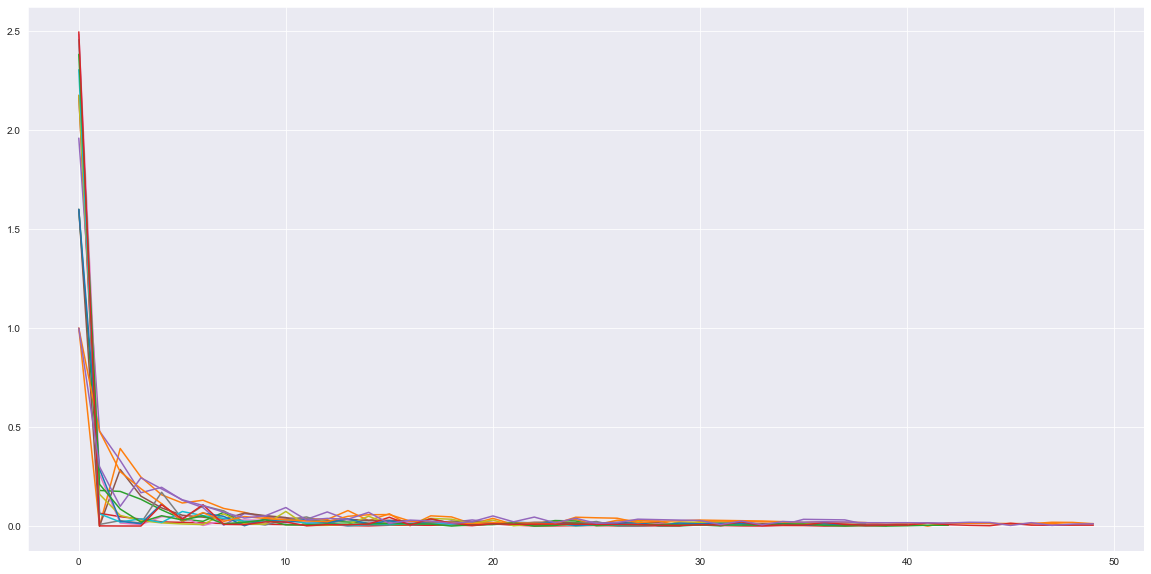

In [6]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

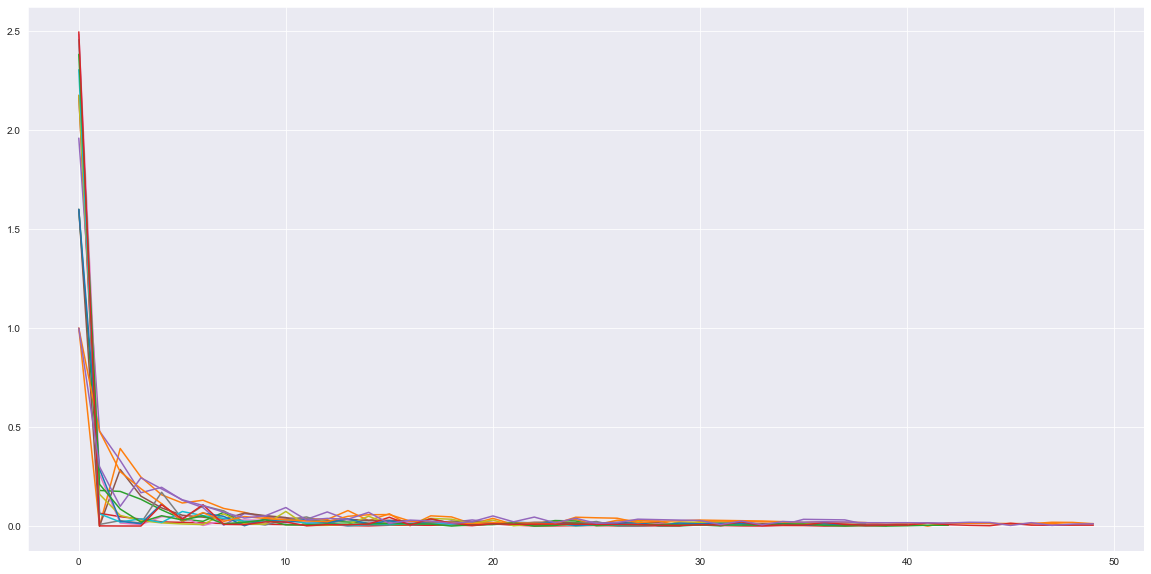

In [7]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)